# **Machine Learning Master Notebook – 2025 Edition**

This notebook is a **full ML master guide** with **theory + code + graphs + simple animations** for the most important classical ML algorithms.

---

## 📚 Algorithms Covered

**Supervised Learning**
- Linear Regression
- Logistic Regression
- k-Nearest Neighbors (k-NN)
- Naive Bayes
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)

**Unsupervised Learning**
- k-Means Clustering
- PCA (Dimensionality Reduction)

Each section includes:
- Intuition & formulas
- From-scratch or sklearn implementation
- Plots / diagrams
- Simple animations using `clear_output` where helpful


## 0. Setup – Imports & Global Config

In [4]:
!pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 3.3 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.1 MB 3.8 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 3.9 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 3.0 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 3.2 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 3.4 MB/s eta 0:00:02
   ------------------------- -------------- 5.2/8.1 MB 3.5 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 3.7 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 3.7 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 3.6 MB/s  0:00:02
Using cached cycler-0.12.1-py3-non

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import make_classification, make_blobs, load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

np.random.seed(42)


## 1. Linear Regression (Supervised – Regression)

We start with **1D Linear Regression** for intuition.

### Model

\[
\hat{y} = w x + b
\]

We choose \( w, b \) to minimize **Mean Squared Error (MSE)**:

\[
J(w,b) = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2
\]

We use **Gradient Descent** to learn parameters.


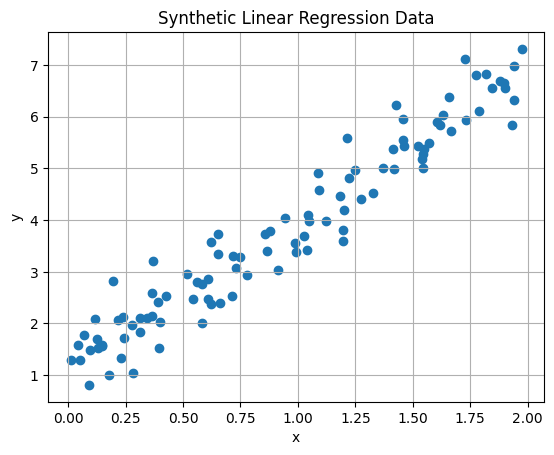

In [6]:
# Generate synthetic linear data
m = 100
X_lin = 2 * np.random.rand(m, 1)
y_lin = 3 * X_lin + 1 + 0.5 * np.random.randn(m, 1)  # y = 3x + 1 + noise

plt.figure()
plt.scatter(X_lin, y_lin)
plt.title("Synthetic Linear Regression Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

Iteration 299, Cost = 0.2016, w = 2.885, b = 1.108


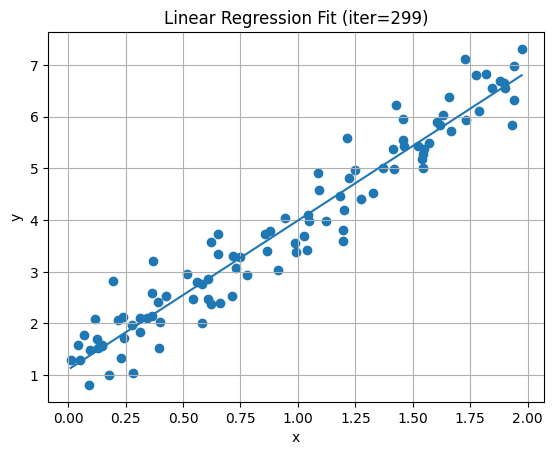

In [8]:
def linear_regression_gd(X, y, alpha=0.1, num_iters=200):
    m = len(y)
    w = 0.0
    b = 0.0
    costs = []

    for i in range(num_iters):
        y_hat = w * X + b
        dw = (2/m) * np.sum((y_hat - y) * X)
        db = (2/m) * np.sum(y_hat - y)
        w -= alpha * dw
        b -= alpha * db

        cost = (1/m) * np.sum((y_hat - y) ** 2)
        costs.append(cost)

        if i % 50 == 0 or i == num_iters - 1:
            clear_output(wait=True)
            print(f"Iteration {i}, Cost = {cost:.4f}, w = {w:.3f}, b = {b:.3f}")
            # Plot line vs data
            plt.figure()
            plt.scatter(X, y)
            x_vals = np.linspace(X.min(), X.max(), 100)
            y_vals = w * x_vals + b
            plt.plot(x_vals, y_vals)
            plt.title(f"Linear Regression Fit (iter={i})")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.grid(True)
            plt.show()
            time.sleep(0.7)

    return w, b, costs

# To see training animation, uncomment and run:
w_lr, b_lr, costs_lr = linear_regression_gd(X_lin, y_lin, alpha=0.1, num_iters=300)

## 2. Logistic Regression (Supervised – Binary Classification)

We now move to **classification**.

### Hypothesis

\[
\hat{y} = \sigma(w^T x + b), \quad \sigma(z) = \frac{1}{1 + e^{-z}}
\]

Interpreted as probability:

\[
\hat{y} = P(y=1 \mid x)
\]

Decision rule:
- If \( \hat{y} \ge 0.5 \Rightarrow \hat{y}_{class} = 1 \)
- Else class 0.


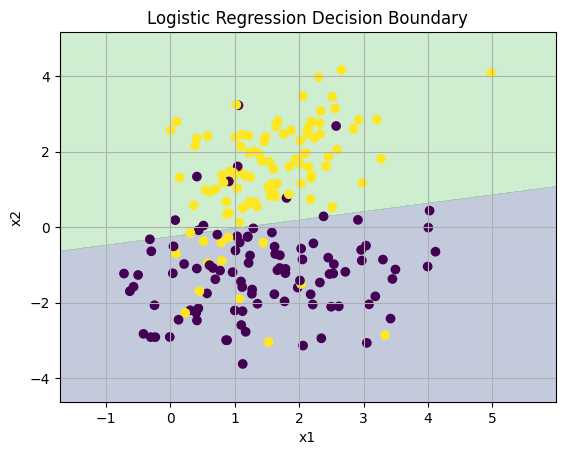

Training accuracy: 0.88


In [9]:
# Create 2D binary classification data
X_log, y_log = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, flip_y=0.1, class_sep=1.5, random_state=42
)

# Train logistic regression using sklearn for simplicity
log_clf = LogisticRegression()
log_clf.fit(X_log, y_log)

# Plot decision boundary
x_min, x_max = X_log[:, 0].min() - 1, X_log[:, 0].max() + 1
y_min, y_max = X_log[:, 1].min() - 1, X_log[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = log_clf.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3)
plt.scatter(X_log[:, 0], X_log[:, 1], c=y_log)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

print("Training accuracy:", log_clf.score(X_log, y_log))

## 3. k-Nearest Neighbors (k-NN)

Non-parametric, instance-based algorithm.

### Idea

To classify a point:
- Compute distance to all training points
- Pick **k nearest neighbors**
- Use majority vote of their labels

No explicit training phase (just storing data).


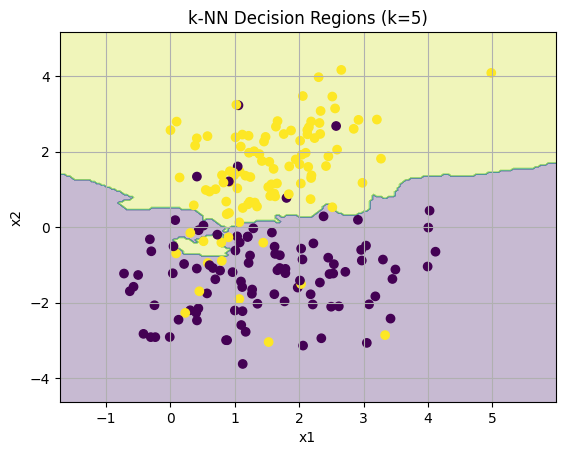

k-NN training accuracy: 0.9


In [10]:
# Use same binary data as logistic
X_knn, y_knn = X_log, y_log

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_knn, y_knn)

# Decision boundary plot
x_min, x_max = X_knn[:, 0].min() - 1, X_knn[:, 0].max() + 1
y_min, y_max = X_knn[:, 1].min() - 1, X_knn[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(grid).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_knn[:, 0], X_knn[:, 1], c=y_knn)
plt.title("k-NN Decision Regions (k=5)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

print("k-NN training accuracy:", knn.score(X_knn, y_knn))

## 4. Naive Bayes (Gaussian NB)

Probabilistic classifier based on **Bayes' theorem** with **independence assumption**.

We use **GaussianNB** for continuous features.


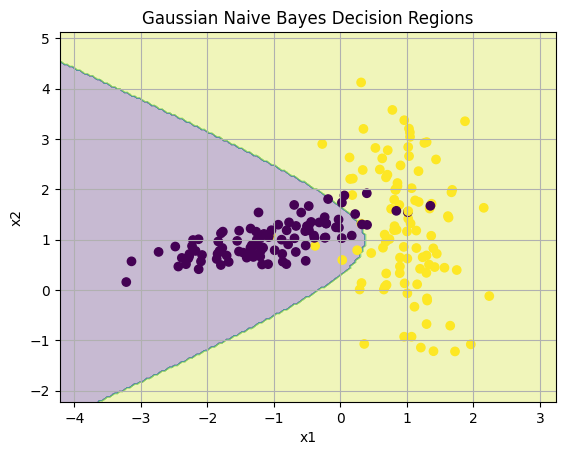

Gaussian NB training accuracy: 0.935


In [11]:
X_nb, y_nb = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, class_sep=1.0, random_state=0
)

gnb = GaussianNB()
gnb.fit(X_nb, y_nb)

# Decision regions
x_min, x_max = X_nb[:, 0].min() - 1, X_nb[:, 0].max() + 1
y_min, y_max = X_nb[:, 1].min() - 1, X_nb[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = gnb.predict(grid).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_nb[:, 0], X_nb[:, 1], c=y_nb)
plt.title("Gaussian Naive Bayes Decision Regions")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

print("Gaussian NB training accuracy:", gnb.score(X_nb, y_nb))

## 5. Decision Tree Classifier

Tree-based model that recursively splits feature space based on conditions like:

\[
x_j \le t
\]

Leaves correspond to class labels.

We will:
- Train on Iris dataset
- Plot the tree diagram
- Visualize decision boundaries in 2D PCA space.


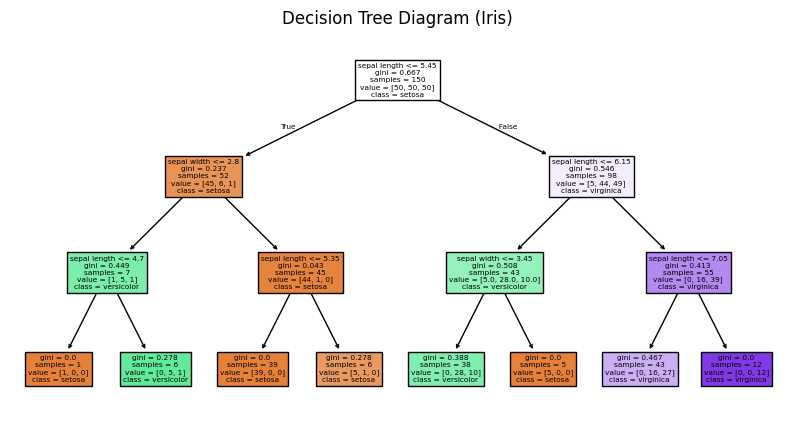

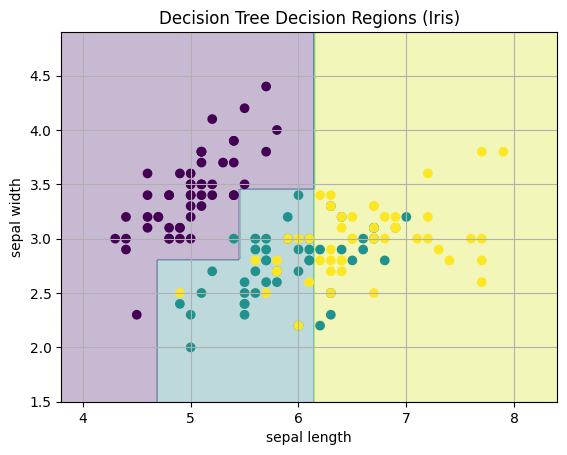

Decision Tree accuracy: 0.8133333333333334


In [12]:
iris = load_iris()
X_iris = iris.data[:, :2]  # take 2 features for plotting
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_iris, y_iris)

plt.figure(figsize=(10, 5))
plot_tree(tree_clf, feature_names=['sepal length', 'sepal width'],
          class_names=iris.target_names, filled=True)
plt.title("Decision Tree Diagram (Iris)")
plt.show()

# Decision regions
x_min, x_max = X_iris[:, 0].min() - 0.5, X_iris[:, 0].max() + 0.5
y_min, y_max = X_iris[:, 1].min() - 0.5, X_iris[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = tree_clf.predict(grid).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Decision Tree Decision Regions (Iris)")
plt.grid(True)
plt.show()

print("Decision Tree accuracy:", tree_clf.score(X_iris, y_iris))

## 6. Random Forest

Ensemble of many decision trees trained on random subsets of data and features.

- Reduces overfitting
- Provides **feature importance**

We plot a **feature importance bar chart**.


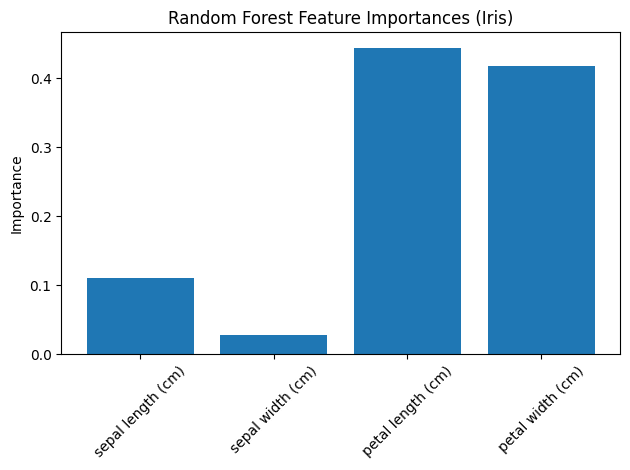

Random Forest accuracy: 1.0


In [13]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(iris.data, iris.target)

importances = rf.feature_importances_
features = iris.feature_names

plt.figure()
plt.bar(range(len(features)), importances)
plt.xticks(range(len(features)), features, rotation=45)
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances (Iris)")
plt.tight_layout()
plt.show()

print("Random Forest accuracy:", rf.score(iris.data, iris.target))

## 7. Support Vector Machine (SVM)

SVM finds a **maximum margin hyperplane** that separates classes.

We visualize:
- Decision boundary
- Margin
- Support vectors


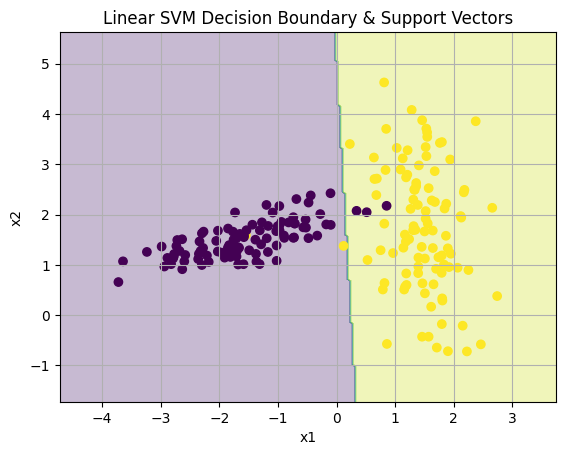

SVM accuracy: 0.975


In [14]:
# Use 2D classification data
X_svm, y_svm = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=1.5, random_state=0
)

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_svm, y_svm)

# Plot decision boundary and support vectors
x_min, x_max = X_svm[:, 0].min() - 1, X_svm[:, 0].max() + 1
y_min, y_max = X_svm[:, 1].min() - 1, X_svm[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = svm_clf.predict(grid).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_svm)
# Highlight support vectors
sv = svm_clf.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=80, facecolors='none')
plt.title("Linear SVM Decision Boundary & Support Vectors")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

print("SVM accuracy:", svm_clf.score(X_svm, y_svm))

## 8. k-Means Clustering (Unsupervised)

k-Means partitions data into **k clusters** by iteratively:

1. Assigning each point to nearest centroid  
2. Recomputing centroids as mean of assigned points  

We implement a simple version with a **step-wise animation** to see clusters evolve.


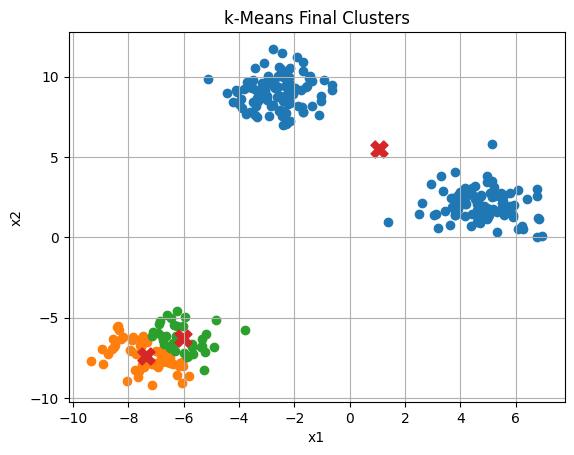

In [15]:
# Generate blob data
X_km, _ = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

def kmeans(X, k=3, num_iters=10, animate=False, delay=0.7):
    m, n = X.shape
    # Randomly choose initial centroids
    rng = np.random.default_rng(42)
    centroids = X[rng.choice(m, k, replace=False)]
    for it in range(num_iters):
        # Assign step
        dists = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)
        labels = np.argmin(dists, axis=1)
        # Update step
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        if animate:
            clear_output(wait=True)
            print(f"Iteration {it}")
            plt.figure()
            for j in range(k):
                pts = X[labels == j]
                plt.scatter(pts[:, 0], pts[:, 1])
            plt.scatter(new_centroids[:, 0], new_centroids[:, 1], marker='X', s=150)
            plt.title(f"k-Means Clustering (iter={it})")
            plt.xlabel("x1"); plt.ylabel("x2")
            plt.grid(True)
            plt.show()
            time.sleep(delay)
        centroids = new_centroids
    return centroids, labels

# To see animation, uncomment:
# final_centroids, final_labels = kmeans(X_km, k=3, num_iters=8, animate=True)

# Final static plot
final_centroids, final_labels = kmeans(X_km, k=3, num_iters=8, animate=False)
plt.figure()
for j in range(3):
    pts = X_km[final_labels == j]
    plt.scatter(pts[:, 0], pts[:, 1])
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker='X', s=150)
plt.title("k-Means Final Clusters")
plt.xlabel("x1"); plt.ylabel("x2")
plt.grid(True)
plt.show()

## 9. PCA – Principal Component Analysis (Dimensionality Reduction)

PCA projects data onto directions (principal components) that maximize variance.

We will:
- Take Iris 4D data
- Project to 2D using PCA
- Visualize the classes in reduced space.


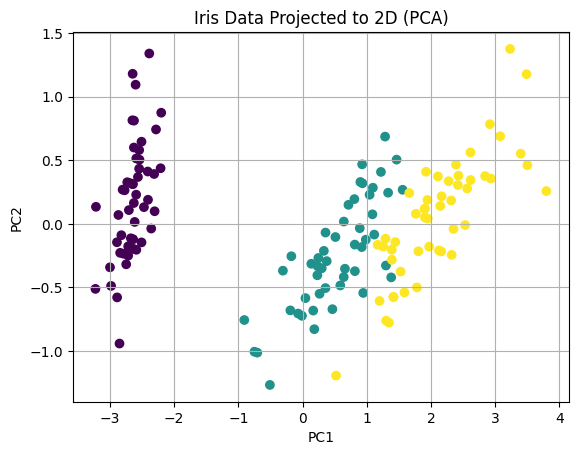

Explained variance ratios: [0.92461872 0.05306648]


In [16]:
X_pca = iris.data  # 4D
y_pca = iris.target

pca = PCA(n_components=2)
X_proj = pca.fit_transform(X_pca)

plt.figure()
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y_pca)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Iris Data Projected to 2D (PCA)")
plt.grid(True)
plt.show()

print("Explained variance ratios:", pca.explained_variance_ratio_)

## 10. Summary

In this ML Master Notebook, you implemented and visualized:

- **Linear Regression** – regression line + training animation  
- **Logistic Regression** – decision boundary for binary classification  
- **k-NN** – non-parametric decision regions  
- **Naive Bayes** – probabilistic classifier with Gaussian assumption  
- **Decision Tree** – tree diagram + decision regions  
- **Random Forest** – ensemble + feature importance bar graph  
- **SVM** – maximum margin separator + support vectors diagram  
- **k-Means** – unsupervised clustering with centroid movement animation  
- **PCA** – dimensionality reduction visualization  

You can now use this notebook as a **revision + implementation + visualization pack** for classical Machine Learning.
